In [1]:
%matplotlib qt

In [2]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)


In [3]:
filename = "demo marker_31.08.20_15.00.17.md.csv"
df = pd.read_csv(filename,skiprows=1)
df.head(10)

,Timestamp,EEG.Counter,EEG.Interpolated,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,...,MOT.InterpolatedMems,MOT.GyroX,MOT.GyroY,MOT.GyroZ,MOT.AccX,MOT.AccY,MOT.AccZ,MOT.MagX,MOT.MagY,MOT.MagZ
0,1.598857e+09,84.0,0.0,4228.205078,4216.538574,4217.436035,4214.615234,4218.461426,4214.230957,4213.974121,...,0.0,8232.0,8128.0,8225.0,4382.0,8557.0,9033.0,8544.0,7842.0,7789.0
1,1.598857e+09,85.0,0.0,4235.641113,4223.205078,4233.461426,4219.871582,4226.922852,4213.589844,4207.307617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.598857e+09,86.0,0.0,4237.948730,4228.077148,4233.846191,4219.358887,4222.436035,4217.436035,4204.102539,...,0.0,8235.0,8135.0,8217.0,4374.0,8549.0,9045.0,8543.0,7839.0,7792.0
3,1.598857e+09,87.0,0.0,4222.307617,4220.384766,4216.666504,4205.256348,4213.205078,4215.000000,4203.333496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.598857e+09,88.0,0.0,4213.077148,4215.897461,4212.179688,4200.256348,4215.256348,4203.974121,4199.871582,...,0.0,8229.0,8130.0,8217.0,4349.0,8544.0,9031.0,8545.0,7839.0,7791.0
5,1.598857e+09,89.0,0.0,4218.077148,4217.307617,4215.769043,4206.794922,4217.948730,4198.461426,4198.333496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.598857e+09,90.0,0.0,4217.820313,4217.820313,4214.487305,4203.333496,4215.000000,4201.538574,4201.282227,...,0.0,8226.0,8130.0,8219.0,4355.0,8570.0,8991.0,8539.0,7838.0,7792.0
7,1.598857e+09,91.0,0.0,4214.358887,4215.769043,4215.000000,4199.358887,4211.282227,4205.128418,4208.205078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.598857e+09,92.0,0.0,4216.922852,4215.256348,4216.922852,4209.102539,4215.641113,4210.512695,4214.102539,...,0.0,8214.0,8130.0,8208.0,4376.0,8558.0,8989.0,8544.0,7840.0,7790.0
9,1.598857e+09,93.0,0.0,4220.641113,4222.436035,4218.461426,4218.974121,4219.615234,4218.717773,4216.025879,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Creating RawArray with float64 data, n_channels=14, n_times=41085
    Range : 0 ... 41084 =      0.000 ...   320.969 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-12 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-12 dB cutoff frequency: 33.75 Hz)
- Filter length: 423 samples (3.305 sec)



/Users/kevinhsu/anaconda3/envs/mne17/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


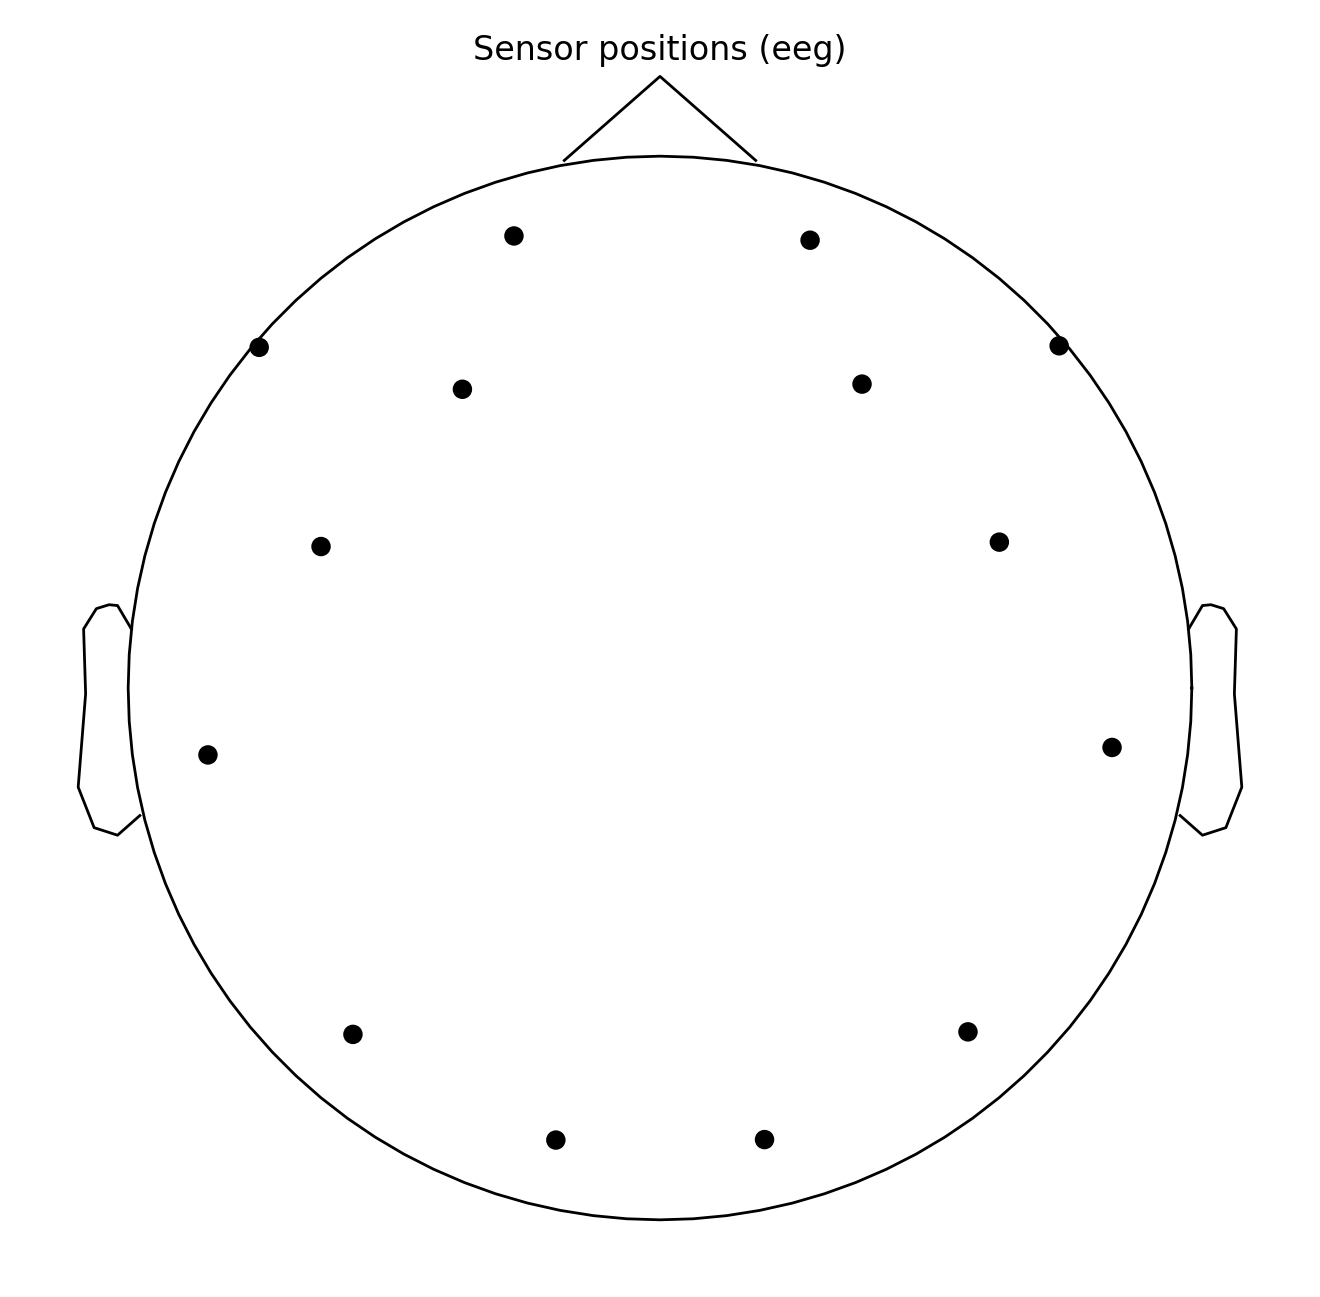

In [4]:
EEG_df = df.ix[:, 'EEG.AF3':'EEG.AF4']
EEG_df = EEG_df - EEG_df.mean()

ch_name=['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

# Sampling rate of the Nautilus machine
sfreq = 128  # Hz

# Create the info structure needed by MNE
info = mne.create_info(ch_name, sfreq,ch_types ='eeg')

# Finally, create the Raw object
raw = mne.io.RawArray(np.transpose(np.array(EEG_df)), info)

raw.filter(1, 30, method='fir', phase= 'zero-double')

# Plot it!
raw.plot(scalings= {'eeg':100})
raw.set_montage(mne.channels.read_montage('standard_1020'))
#raw.set_montage(mne.channels.make_standard_montage('standard_1020'))
raw.plot_sensors()

In [5]:
ica_ = ICA(n_components=5, random_state=97)
ica_.fit(raw)
ica_.plot_sources(raw)
ica_.plot_components()

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 5 components
Fitting ICA took 0.7s.


[<Figure size 1500x500 with 5 Axes>]

Transforming to ICA space (5 components)
Zeroing out 3 ICA components


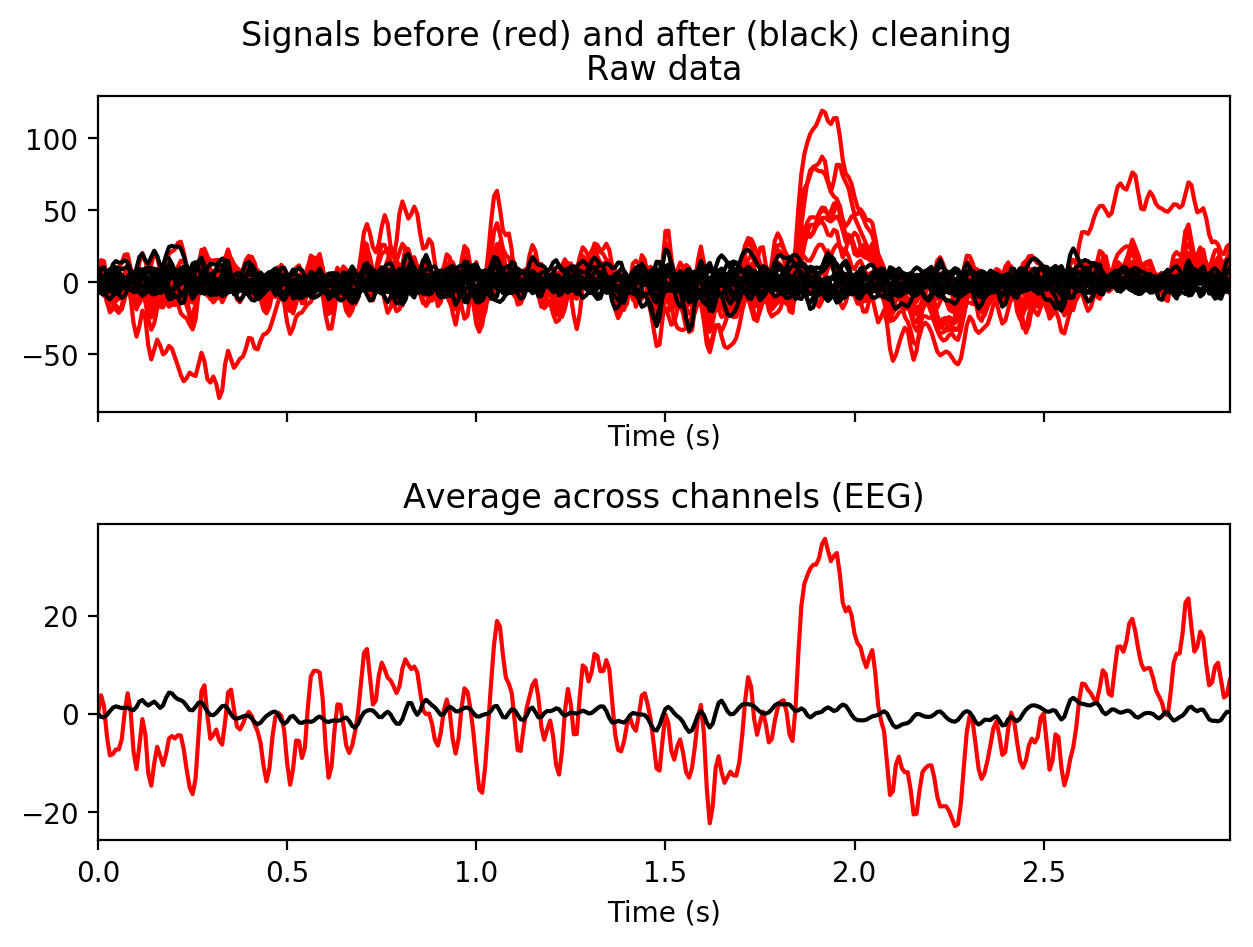

In [6]:
ica_.plot_overlay(raw, exclude=[0, 2, 3], picks='eeg')

Transforming to ICA space (5 components)
Zeroing out 3 ICA components


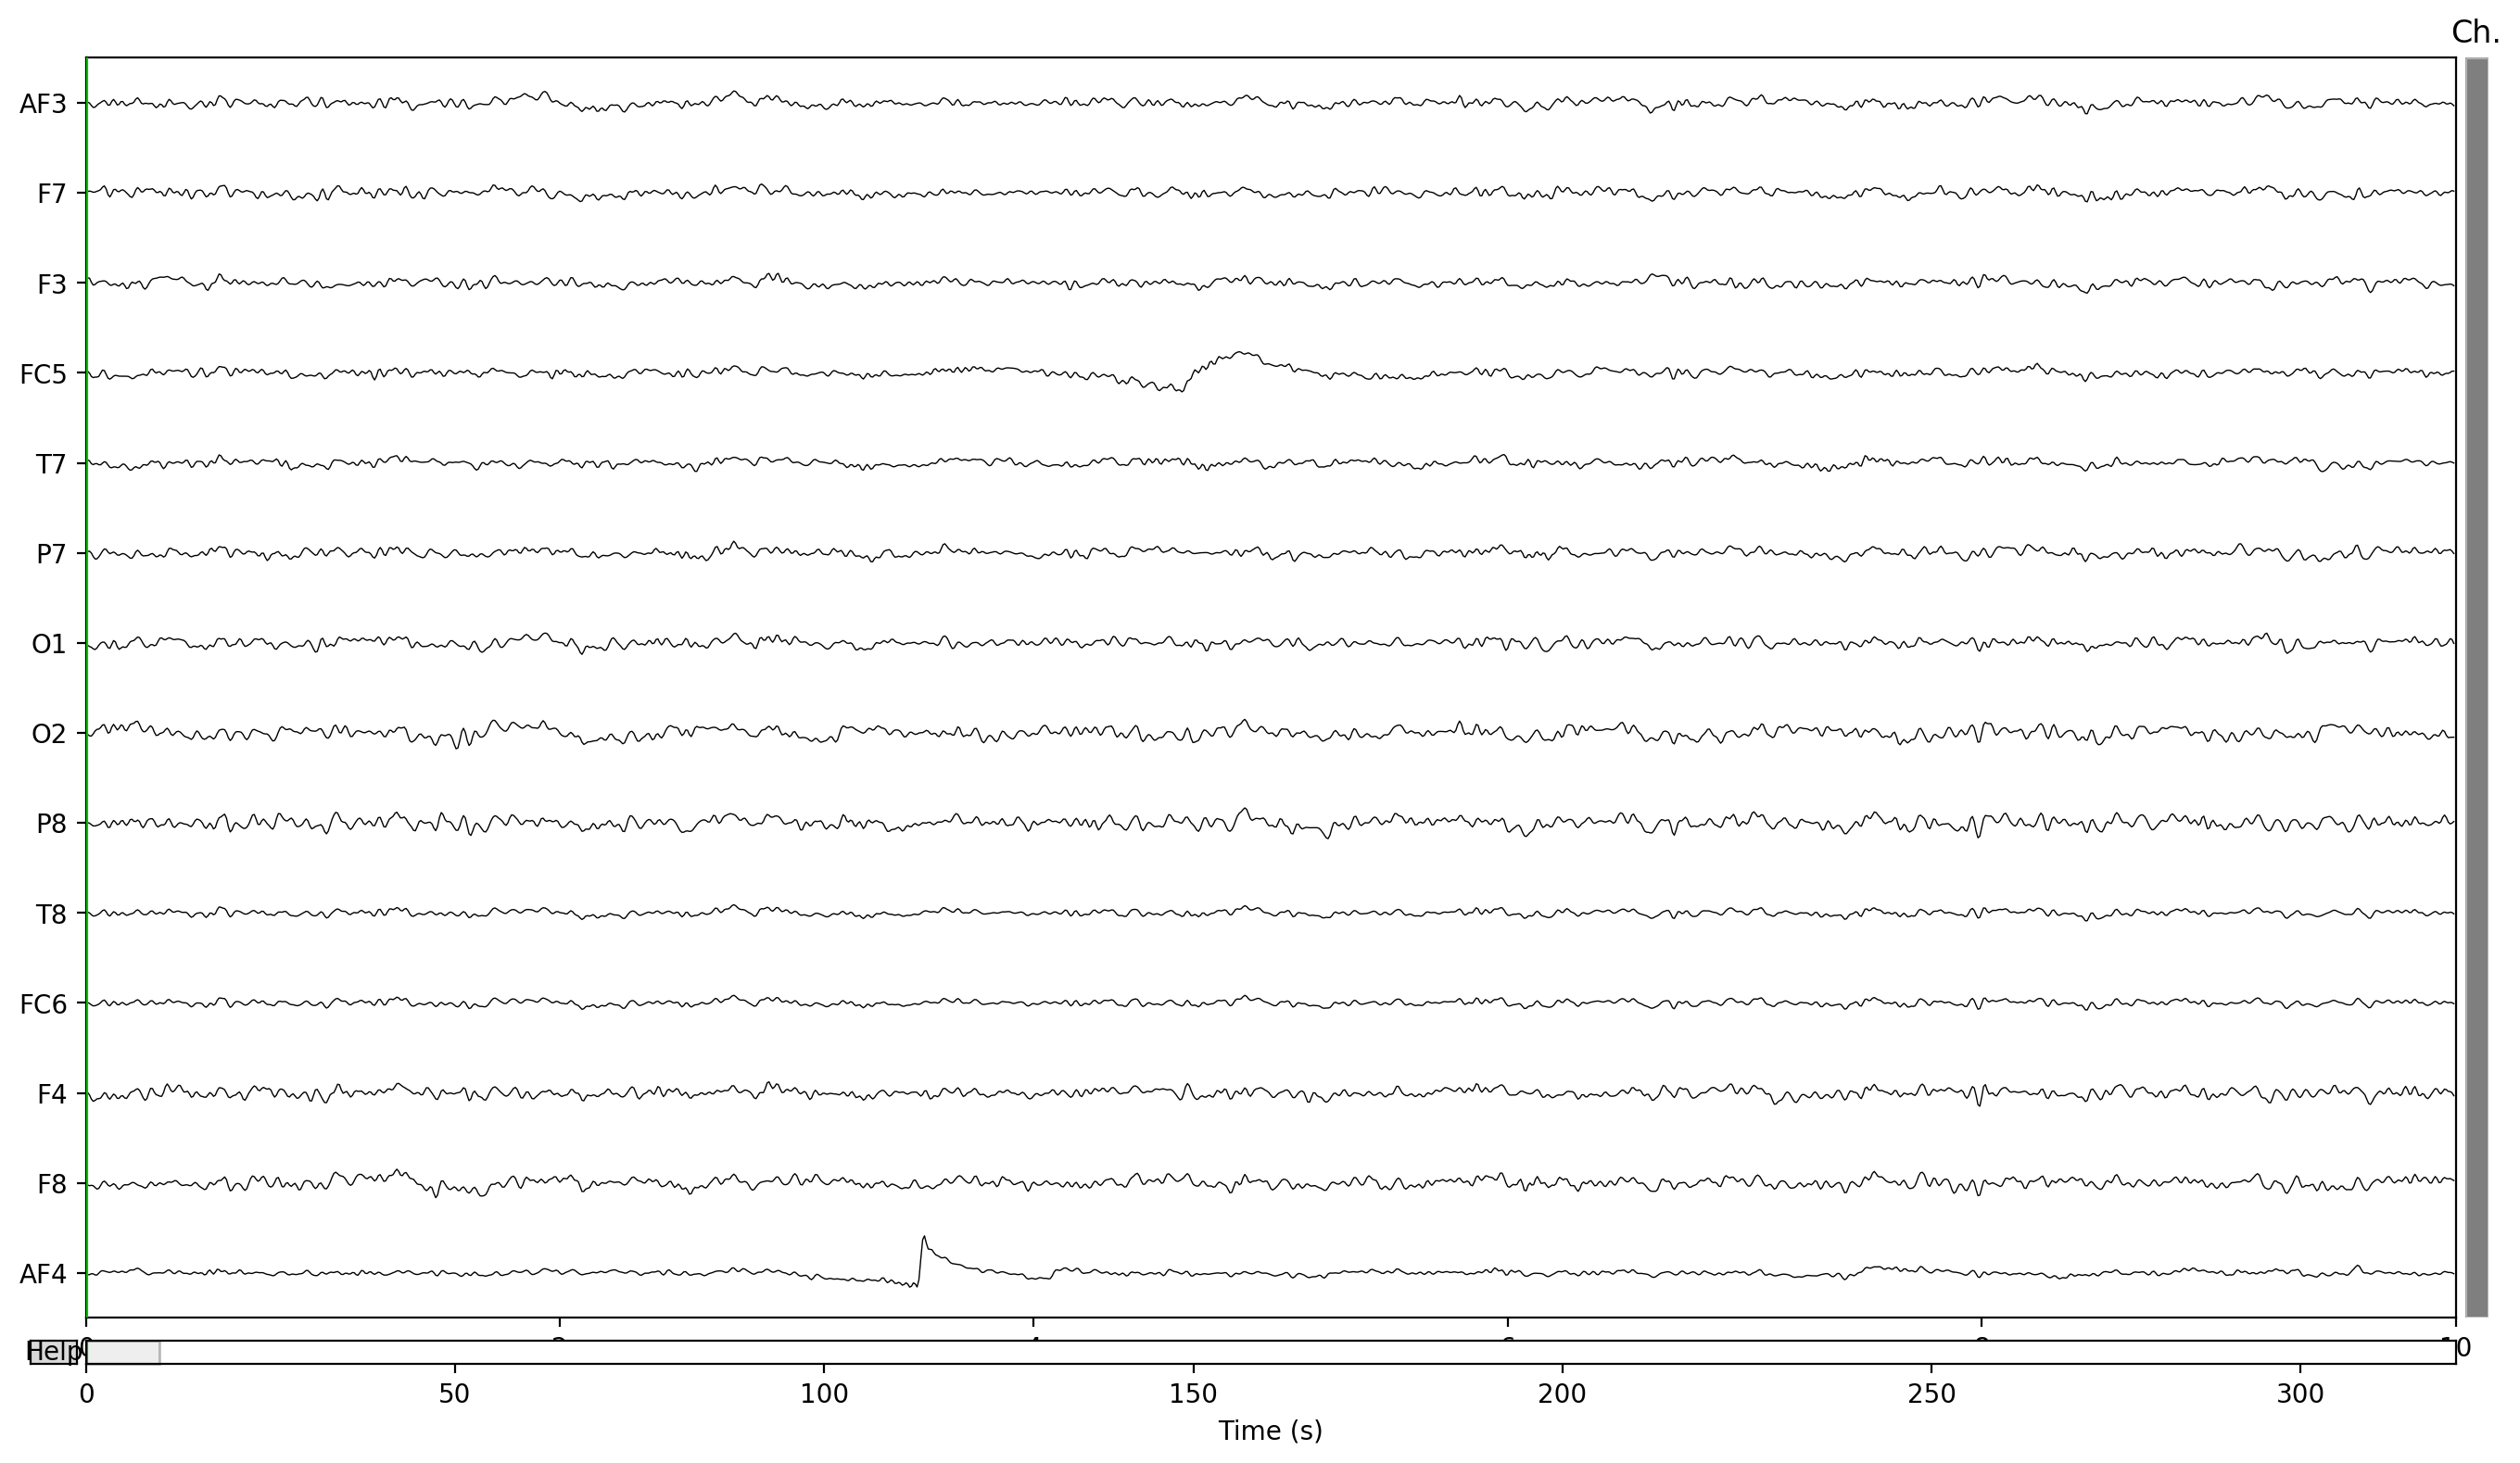

In [7]:
ica_.exclude = [1, 2, 3]
raw_eog_free = raw.copy()
ica_.apply(raw_eog_free)
raw_eog_free.plot(scalings= {'eeg':100})

In [8]:
EEG_events = df.ix[:, 'MarkerType']
EEG_events.head(10)

/Users/kevinhsu/anaconda3/envs/mne17/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    1.0
9    NaN
Name: MarkerType, dtype: float64

In [9]:
temp_events = np.argwhere(~np.isnan(EEG_events))
print(type(temp_events))
print(temp_events.shape)

<class 'numpy.ndarray'>
(200, 1)


In [10]:
temp_events.dtype

dtype('int64')

In [11]:
events = np.zeros((temp_events.shape[0], 3), dtype = np.int64)
for i in range(temp_events.shape[0]):
    events[i][0] = temp_events[i][0]
    events[i][2] = 1
    pass

events

array([[    8,     0,     1],
       [  212,     0,     1],
       [  409,     0,     1],
       [  610,     0,     1],
       [  811,     0,     1],
       [ 1014,     0,     1],
       [ 1218,     0,     1],
       [ 1425,     0,     1],
       [ 1625,     0,     1],
       [ 1823,     0,     1],
       [ 2025,     0,     1],
       [ 2230,     0,     1],
       [ 2432,     0,     1],
       [ 2638,     0,     1],
       [ 2839,     0,     1],
       [ 3040,     0,     1],
       [ 3248,     0,     1],
       [ 3452,     0,     1],
       [ 3660,     0,     1],
       [ 3863,     0,     1],
       [ 4070,     0,     1],
       [ 4271,     0,     1],
       [ 4479,     0,     1],
       [ 4686,     0,     1],
       [ 4889,     0,     1],
       [ 5092,     0,     1],
       [ 5297,     0,     1],
       [ 5507,     0,     1],
       [ 5711,     0,     1],
       [ 5917,     0,     1],
       [ 6121,     0,     1],
       [ 6326,     0,     1],
       [ 6535,     0,     1],
       [ 6

In [12]:
tmin = -0.2         # pre stimulis interval (in seconds) #
tmax = 1.0          # post stimulus interval #

# artifact rejection criteria
reject = dict(eeg=100) # +/- 100µT

# baseline correction
baseline = (None, 0)

# do the actual epoching processes
epochs = mne.Epochs(raw_eog_free, events = events, tmin = tmin, tmax = tmax, proj = False,
                    baseline=baseline, preload = True,
                    reject=reject)

200 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Loading data for 200 events and 155 original time points ...
    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F8']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'O2', 'P8', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'T7', 'T8', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['AF3', 'F7

In [13]:
evoked = epochs.average()

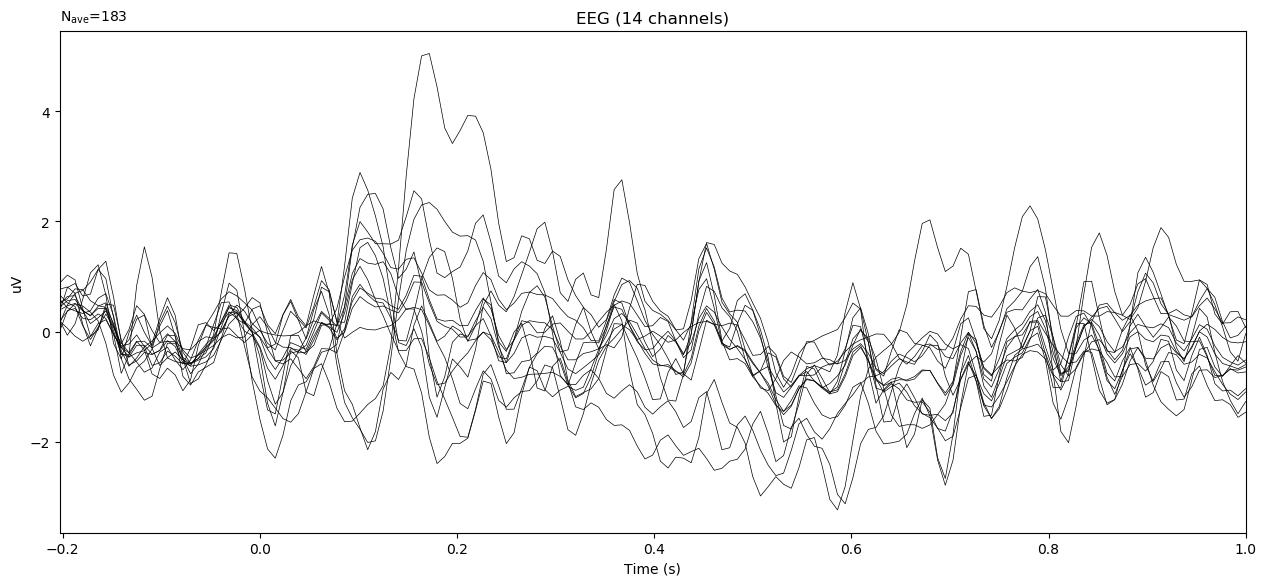

In [14]:
evoked.plot(scalings={'eeg':1})